Solving the system of differential equations:
$$
\frac{d^2\mathbf{x}}{dt^2}=k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}\mathbf{x}
$$
gives
$$
\mathbf{x} = \mathbb{cosh}(t\sqrt{\mathbf{A}})
$$
where:
$$
\mathbf{A} = k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}
$$
and you can generalize this system for n springs

In [1]:
using Plots, FFTW
spring_n = 3
spring_ms = [1,3,3]
spring_ks = [1, 1, 1]

A = zeros(spring_n,spring_n)

for i ∈ 1:spring_n
    for j ∈ 1:spring_n
        if i == 1 && j == 1
            A[i,j] = -(spring_ks[1])/spring_ms[1]
        
        elseif i == j
            A[i,j] = -spring_ks[j]/spring_ms[j-1] -(spring_ks[j])/spring_ms[j]

        elseif i == j-1
            A[i,j] = (spring_ks[j])/spring_ms[i]
        
        elseif i == j+1
            A[i,j] = (spring_ks[j])/spring_ms[j]
        
        end
    end
end
print(A)

t = range(0, 100, length=1000)

initial = [-1,0,1]

x = [cosh(i * sqrt(A)) * initial for i ∈ t]

x_vals = [[real(i[j]) for i ∈ x] for j ∈ 1:spring_n]


[-1.0 1.0 0.0; 1.0 -1.3333333333333333 0.3333333333333333; 0.0 0.3333333333333333 -0.6666666666666666]

3-element Vector{Vector{Float64}}:
 [-1.0, -0.9949969526160625, -0.9800711989655305, -0.9554712368343783, -0.9216057059042067, -0.8790352271997526, -0.8284612242841098, -0.7707119656738167, -0.7067261272474912, -0.6375342261628932  …  0.23537218110461497, 0.2749074008095615, 0.3078074648671353, 0.334075146990635, 0.353850303747889, 0.36740243358468594, 0.37512046359009243, 0.3775000203544415, 0.3751284962115869, 0.3686682699780822]
 [0.0, -0.003333043049661385, -0.013248823973833434, -0.029499206237752623, -0.05167694661407518, -0.07922502282718576, -0.1114493979658783, -0.14753493526326342, -0.18656410608550636, -0.22753807117711206  …  -0.41415875328205587, -0.3884625195770637, -0.35524829156388826, -0.31496080819458777, -0.2682044541231152, -0.21573115130483253, -0.15842493913335384, -0.09728357725251416, -0.033397571655539665, 0.032072917689668745]
 [1.0, 0.9966609201944223, 0.9866548705024989, 0.9700156230900656, 0.9468001338252421, 0.9170895188647401, 0.8809903689664561, 0.838636

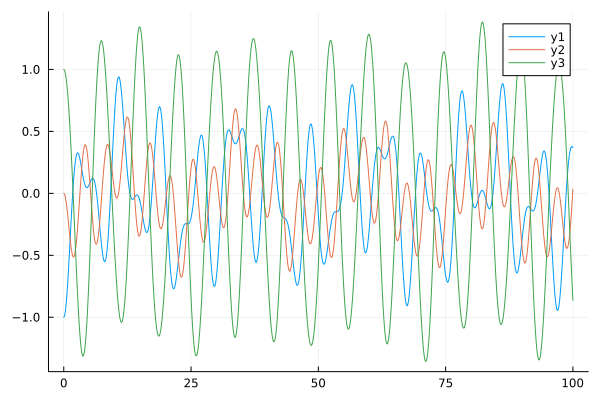

In [2]:
plot(t, [x_vals])

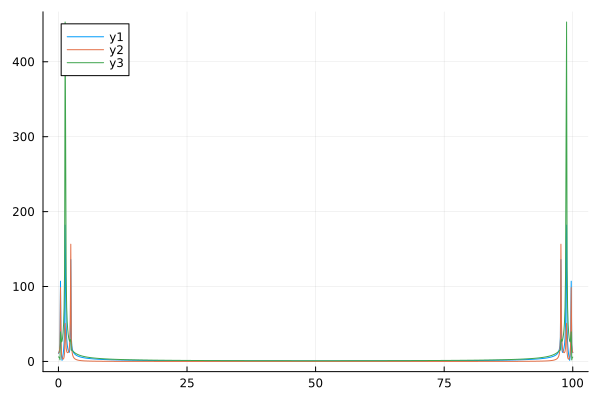

In [3]:
fft_x_vals = [fft(i) for i ∈ x_vals]

mag_fft_x_vals = [[abs(i) for i ∈ j] for j ∈ fft_x_vals]
arg_fft_x_vals = [[angle(i) for i ∈ j] for j ∈ fft_x_vals]

plot(t, mag_fft_x_vals)

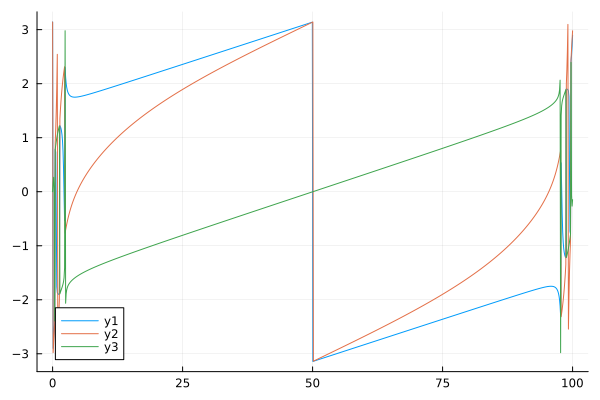

In [4]:
plot(t, [arg_fft_x_vals])

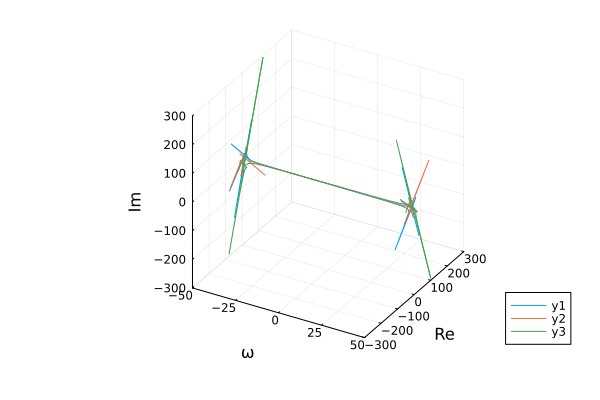

In [28]:
re_fft_x_vals = [[real(i) for i ∈ j] for j ∈ fft_x_vals]
im_fft_x_vals = [[imag(i) for i ∈ j] for j ∈ fft_x_vals]

plot(
    [i - (t[end]-t[begin])/2 for i ∈ t],
    re_fft_x_vals,
    im_fft_x_vals,
    xlimit=(t[begin] * 3/2 - t[end]/2,t[end]/2-t[begin]/2),
    ylimit=(-300,300),
    zlimit=(-300,300),
    xlabel="ω",
    ylabel="Re",
    zlabel="Im",
)